#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

고객별 속성 데이터 

- id: 1번 ~ 100번 일련번호
- gender: 0, 1 정수, 난수 생성
- age: 10 ~ 80 사이 정수 난수를 생성하고 범주화하여 age_cat 파생
- region: 1 ~ 5 사이 난수 생성

거래 데이터 

- id: 1번 ~ 100번 일련번호 (관측치 1000개)
- product: 고급제품(hpd), 일반제품(ldp)로 구분
- price: 100 ~ 200 사이 정수 난수 생성
- qty: 1 ~ 2 사이 정수 난수 생성
- day: 요일
- date: 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- amount: price * qty 로 산출 

In [22]:
# 고객 속성 데이터 생성
import pandas as pd
import numpy as np
np.random.seed(0)
pid = np.arange(1,101)
i1 = pd.Series(pid)
gender = np.random.randint(2,size=100)
g1 = pd.Series(gender)
age = np.random.randint(10,81,size=100)
a1 = pd.Series(age)
region = np.random.randint(6,size=100)
r1 = pd.Series(region)

df = pd.concat([i1,g1,a1,r1],axis=1)
df.columns=['pid','gender','age','region']
df.head()

,pid,gender,age,region
0,1,0,52,3
1,2,1,78,2
2,3,1,16,3
3,4,0,78,2
4,5,1,57,4


In [23]:
def age_cat(a):
    if a < 20 : cat = 1
    elif a < 30 : cat = 2 
    elif a < 40 : cat = 3 
    elif a < 50 : cat = 4 
    elif a < 60 : cat = 5
    else : cat = 6
    return cat

df['age_cat'] = df['age'].apply(age_cat)
df.drop(['age'],axis=1,inplace=True)
df.head()

,pid,gender,region,age_cat
0,1,0,3,5
1,2,1,2,6
2,3,1,3,1
3,4,0,2,6
4,5,1,4,5


In [24]:
za = np.zeros((1000,6)) # 1000행 6열의 제로 배열 생성
df2 = pd.DataFrame(za,columns=['pid','product','price','qty','day','date'])
df2.head()

,pid,product,price,qty,day,date
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
np.random.seed(1)
df2['pid'] = np.random.randint(1,101,1000)
df2['product'] = np.random.randint(1,3,1000)
df2['price'] = np.random.randint(100,200,1000)
df2['qty'] = np.random.randint(1,3,1000)
df2['day'] = np.random.choice(['MON','TUE','WED','THU','FRI','SAT','SUN'],1000)
df2['date'] = pd.date_range(start='2020-01-01',end='2021-12-31',periods=1000)
df2['year'] = df2['date'].dt.year # 월별로 만들어서 분기별로 다시 분류하기
df2 = df2.drop('date',axis=1)
df2.head()

,pid,product,price,qty,day,year
0,38,2,159,2,SAT,2020
1,13,1,117,2,TUE,2020
2,73,1,122,2,SAT,2020
3,10,2,154,2,FRI,2020
4,76,2,113,2,SUN,2020


In [26]:
df2.shape
df2.isnull().sum()
df2.describe()


,pid,product,price,qty,year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.074000,1.484000,150.938000,1.529000,2020.499000
std,28.805317,0.499994,29.085187,0.499408,0.500249
min,1.000000,1.000000,100.000000,1.000000,2020.000000
25%,26.000000,1.000000,126.000000,1.000000,2020.000000
50%,49.000000,1.000000,152.000000,2.000000,2020.000000
75%,76.000000,2.000000,177.000000,2.000000,2021.000000
max,100.000000,2.000000,199.000000,2.000000,2021.000000


In [27]:
# product 1 = 고가 / 2 = 저가
def pddiff(product,price):
    if product == 1 :
        return price * 20
    else :
        return price * 10

df2['price'] = df2.apply(lambda x : pddiff(x['product'],x['price']),axis=1)
df2.head()

,pid,product,price,qty,day,year
0,38,2,1590,2,SAT,2020
1,13,1,2340,2,TUE,2020
2,73,1,2440,2,SAT,2020
3,10,2,1540,2,FRI,2020
4,76,2,1130,2,SUN,2020


In [28]:
# quantiry 1 = 소량 / 2 = 대량
def qtydiff(product,qty):
    if product == 2:
        return qty * 10
    else :
        return qty

df2['qty'] = df2.apply(lambda x : qtydiff(x['product'],x['qty']),axis=1)
df2.head()

,pid,product,price,qty,day,year
0,38,2,1590,20,SAT,2020
1,13,1,2340,2,TUE,2020
2,73,1,2440,2,SAT,2020
3,10,2,1540,20,FRI,2020
4,76,2,1130,20,SUN,2020


In [29]:
df2['amount'] = df2['qty'] * df2['price']
df2.head()

,pid,product,price,qty,day,year,amount
0,38,2,1590,20,SAT,2020,31800
1,13,1,2340,2,TUE,2020,4680
2,73,1,2440,2,SAT,2020,4880
3,10,2,1540,20,FRI,2020,30800
4,76,2,1130,20,SUN,2020,22600


In [30]:
pdf = df2.copy()
pdf = pdf.drop(['qty','price'],axis=1)
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      1000 non-null   int64 
 1   product  1000 non-null   int64 
 2   day      1000 non-null   object
 3   year     1000 non-null   int64 
 4   amount   1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [31]:
pdf.groupby(['product','year'])['amount'].sum()

product  year
1        2020    1214220
         2021    1248000
2        2020    5539000
         2021    5278000
Name: amount, dtype: int64

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요. 

In [32]:
# 인사이트 삽입
# 코로나로 고급품의 매출은 유지된 반면 생활용품 위주로 판매 급감
def pdcut(year,product,amount):
    if (year == 2021) & (product == 2):
        return amount * 0.5
    else : 
        return amount

pdf['amount'] = pdf.apply(lambda x : pdcut(x['year'],x['product'],x['amount']),axis=1)
pdf.head()

,pid,product,day,year,amount
0,38,2,SAT,2020,31800.0
1,13,1,TUE,2020,4680.0
2,73,1,SAT,2020,4880.0
3,10,2,FRI,2020,30800.0
4,76,2,SUN,2020,22600.0


In [33]:
pdf.groupby(['product','year'])['amount'].sum()

product  year
1        2020    1214220.0
         2021    1248000.0
2        2020    5539000.0
         2021    2639000.0
Name: amount, dtype: float64

In [34]:
pdf.head()

,pid,product,day,year,amount
0,38,2,SAT,2020,31800.0
1,13,1,TUE,2020,4680.0
2,73,1,SAT,2020,4880.0
3,10,2,FRI,2020,30800.0
4,76,2,SUN,2020,22600.0


In [35]:
# 고객별 구매상품별 연간 구매금액 변동율
pdf['yp'] = pdf[['year','product']].astype(str).apply('_'.join,axis=1)
pdf.head()

,pid,product,day,year,amount,yp
0,38,2,SAT,2020,31800.0,2020_2
1,13,1,TUE,2020,4680.0,2020_1
2,73,1,SAT,2020,4880.0,2020_1
3,10,2,FRI,2020,30800.0,2020_2
4,76,2,SUN,2020,22600.0,2020_2


In [36]:
pdf1 = pd.pivot_table(pdf,index='pid',columns='yp',values='amount',aggfunc='sum')
pdf1
# 고객아이디로 년도별 고가 저가 제품 구매액 분류
# 속성데이터(df) 기준으로 두 개의 데이터를 합칠 수 있음
# pid가 기존에 여러 개 였는데 전처리를 통해서 고유 pid 기준으로 결과를 출력 할 수 있음
# 피벗테이블에서도 인덱스를 다른 테이블의 인덱스에 해당하는 것으로 지정하면
# 다른 데이터프레임과 결합할 수 있는 피벗테이블 생성이 가능하다.
# pid 기준으로 merge

yp,2020_1,2020_2,2021_1,2021_2
pid,,,,
1,7400.0,79000.0,17520.0,29400.0
2,5000.0,17100.0,30400.0,42550.0
3,6580.0,113000.0,5120.0,6050.0
4,13700.0,49200.0,16080.0,16350.0
5,NaN,NaN,9380.0,40650.0
...,...,...,...,...
96,7280.0,NaN,9040.0,47700.0
97,8100.0,96800.0,25580.0,70150.0
98,2400.0,60400.0,24840.0,37650.0


In [37]:
# 각 연도, 제품별 결측값 처리
pdf1['2020_1'].fillna(pdf1['2020_1'].mean(),inplace=True)
pdf1['2020_2'].fillna(pdf1['2020_2'].mean(),inplace=True)
pdf1['2021_1'].fillna(pdf1['2021_1'].mean(),inplace=True)
pdf1['2021_2'].fillna(pdf1['2021_2'].mean(),inplace=True)
pdf1.columns.name = None
pdf1.reset_index(inplace=True)
pdf1.head()

,pid,2020_1,2020_2,2021_1,2021_2
0,1,7400.000000,79000.000000,17520.0,29400.0
1,2,5000.000000,17100.000000,30400.0,42550.0
2,3,6580.000000,113000.000000,5120.0,6050.0
3,4,13700.000000,49200.000000,16080.0,16350.0
4,5,13198.043478,60206.521739,9380.0,40650.0


In [47]:
pdf1['2020_1'] = (pdf1['2020_1'] / pdf1['2020_1'].sum()) * 100
pdf1['2020_2'] = (pdf1['2020_2'] / pdf1['2020_2'].sum()) * 100
pdf1['2021_1'] = (pdf1['2021_1'] / pdf1['2021_1'].sum()) * 100
pdf1['2021_2'] = (pdf1['2021_2'] / pdf1['2021_2'].sum()) * 100
pdf1.head()

,pid,2020_1,2020_2,2021_1,2021_2
0,1,0.560689,1.312150,1.375769,0.991512
1,2,0.378844,0.284022,2.387179,1.434994
2,3,0.498559,1.876873,0.402051,0.204036
3,4,1.038033,0.817187,1.262692,0.551402
4,5,1.000000,1.000000,0.736571,1.370917


In [52]:
# 고객별 구매 제품의 비중
pdf1['hpd'] = (pdf1['2021_1'] - pdf1['2020_1']) / pdf1['2020_1']
pdf1['lpd'] = (pdf1['2021_2'] - pdf1['2020_2']) / pdf1['2020_2']
pdf2 = pdf1[['pid','hpd','lpd']]
pdf2.head()

,pid,hpd,lpd
0,1,1.453711,-0.244361
1,2,5.301220,4.052399
2,3,-0.193573,-0.891290
3,4,0.216428,-0.325244
4,5,-0.263429,0.370917


In [54]:
df = pd.merge(df,pdf2,on='pid',how='outer')
df.head()

,pid,gender,region,age_cat,hpd,lpd
0,1,0,3,5,1.453711,-0.244361
1,2,1,2,6,5.301220,4.052399
2,3,1,3,1,-0.193573,-0.891290
3,4,0,2,6,0.216428,-0.325244
4,5,1,4,5,-0.263429,0.370917


In [57]:
# 종속변수 정의
df_y = pdf[['pid','year','amount']]
pvt = pd.pivot_table(df_y,index='pid',columns='year',values='amount',aggfunc='sum')
pvt = pvt.reset_index()
pvt.columns.name = None
pvt.head()


,pid,2020,2021
0,1,86400.0,46920.0
1,2,22100.0,72950.0
2,3,119580.0,11170.0
3,4,62900.0,32430.0
4,5,NaN,50030.0


In [58]:
pvt[2020].fillna(pvt[2020].mean(),inplace=True)
pvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pid     100 non-null    int64  
 1   2020    100 non-null    float64
 2   2021    100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [59]:
df = pd.merge(df,pvt,on='pid',how='outer')
df.head()

,pid,gender,region,age_cat,hpd,lpd,2020,2021
0,1,0,3,5,1.453711,-0.244361,86400.000000,46920.0
1,2,1,2,6,5.301220,4.052399,22100.000000,72950.0
2,3,1,3,1,-0.193573,-0.891290,119580.000000,11170.0
3,4,0,2,6,0.216428,-0.325244,62900.000000,32430.0
4,5,1,4,5,-0.263429,0.370917,68910.408163,50030.0


In [60]:
# 종속변수 만들기
df['ratio'] = (df[2021] - df[2020]) / df[2020]
df.head()

,pid,gender,region,age_cat,hpd,lpd,2020,2021,ratio
0,1,0,3,5,1.453711,-0.244361,86400.000000,46920.0,-0.456944
1,2,1,2,6,5.301220,4.052399,22100.000000,72950.0,2.300905
2,3,1,3,1,-0.193573,-0.891290,119580.000000,11170.0,-0.906590
3,4,0,2,6,0.216428,-0.325244,62900.000000,32430.0,-0.484420
4,5,1,4,5,-0.263429,0.370917,68910.408163,50030.0,-0.273985


In [61]:
# 고객별 구매증ㅁ가율 예측 모델을 위한 분석용 데이터셋
df1 = df.drop([2020,2021],axis=1)
df1.head()

,pid,gender,region,age_cat,hpd,lpd,ratio
0,1,0,3,5,1.453711,-0.244361,-0.456944
1,2,1,2,6,5.301220,4.052399,2.300905
2,3,1,3,1,-0.193573,-0.891290,-0.906590
3,4,0,2,6,0.216428,-0.325244,-0.484420
4,5,1,4,5,-0.263429,0.370917,-0.273985


In [64]:
def mklabel(a,b):
    if b >= a:
        return 1
    else :
        return 0

df['target'] = df.apply(lambda x : mklabel(x[2020],x[2021]),axis=1)
df.head()

,pid,gender,region,age_cat,hpd,lpd,2020,2021,ratio,target
0,1,0,3,5,1.453711,-0.244361,86400.000000,46920.0,-0.456944,0
1,2,1,2,6,5.301220,4.052399,22100.000000,72950.0,2.300905,1
2,3,1,3,1,-0.193573,-0.891290,119580.000000,11170.0,-0.906590,0
3,4,0,2,6,0.216428,-0.325244,62900.000000,32430.0,-0.484420,0
4,5,1,4,5,-0.263429,0.370917,68910.408163,50030.0,-0.273985,0


In [66]:
y = df['target']
x = df.drop(['pid',2020,2021,'ratio','target'],axis=1)

In [67]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = y # 종속변수
X_t_df = x # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape)


(80, 5)
(20, 5)


In [76]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.95, lr 정확도:0.95


In [63]:
# lpd 컬럼과 증감율 ratio의 상관관계가 0.5 초과
df1[['lpd','hpd','ratio']].corr()

,lpd,hpd,ratio
lpd,1.000000,0.142194,0.556799
hpd,0.142194,1.000000,0.221659
ratio,0.556799,0.221659,1.000000


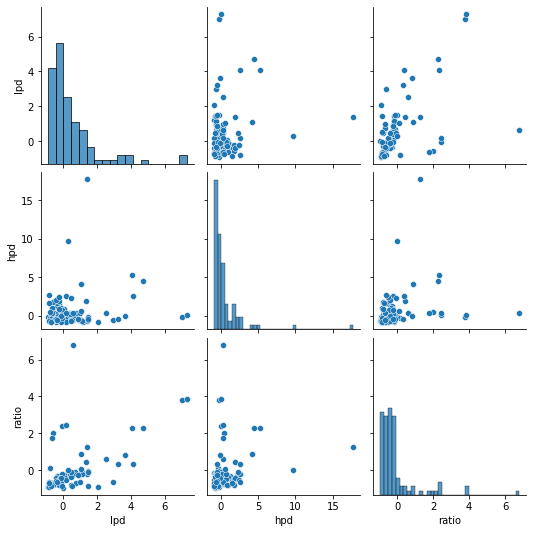

In [62]:
import seaborn as sns
sns.pairplot(df1[['lpd','hpd','ratio']])

#### Q3. df를 탐색적 분석을 통하여 인사이트를 도출하세요.